Make a calibration file for the "kpup_snspd" project.

Typical resonances are 2.695, 2.7235, 2.767, 2.796, 2.83

In [1]:
import importlib
from mkids import TopSoc
import numpy as np
import matplotlib.pyplot as plt
import Scan
import pickle
import datetime

In [2]:
# This should take a few seconds.  If it seems to hang, interrupt
# the kernel and run it again.  
soc = TopSoc()

In [3]:
scan = Scan.Scan(soc)

In [4]:
fTones = 1e3*np.array([2.695, 2.7235, 2.767, 2.796, 2.83])

In [5]:
fMixer = 2500
soc.set_mixer(fMixer)

2499.9999755859376

In [6]:
f0 = fTones.min() - 3
f1 = fTones.max() + 3
fToneMid = fTones.mean()
print("fToneMid =",fToneMid)

fToneMid = 2762.3


measure nominal delay for fTone=2762.300000  outCh=109


  0%|          | 0/20 [00:00<?, ?it/s]

30.37205914480762


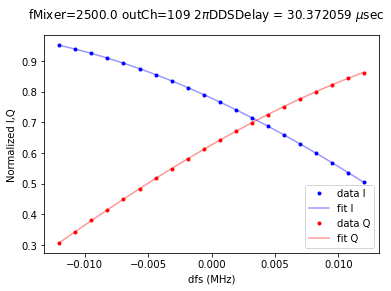

In [11]:
# Measure the nominal delay near fTone
outCh = scan.soc.outFreq2ch(fToneMid)
print("measure nominal delay for fTone=%f  outCh=%d"%(fToneMid, outCh))
nominalDelay = scan.measureNominalDelay(outCh, decimation=2, doProgress=True, doPlot=True)
print(nominalDelay)

In [12]:
# Make a calibration with nt transfers at nf frequencies, with the nominalDelay correction applied
nt,nf = 10,401
print("f0 =",f0)
print("f1 =",f1)
calibration = scan.makeCalibration(fMixer, f0, f1, nf=nf, nt=nt, doProgress=True,
                            nominalDelay=nominalDelay)


f0 = 2692.0
f1 = 2833.0


  0%|          | 0/401 [00:00<?, ?it/s]

In [13]:
calibrationFscan = calibration['fscan']
print("delayApplied =",calibrationFscan['delayApplied'])


delayApplied = 30.37205914480762


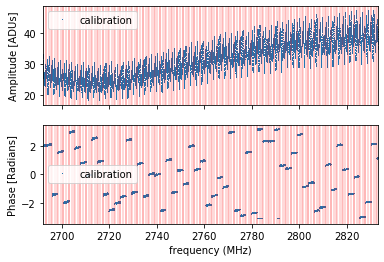

In [14]:
importlib.reload(Scan)
Scan.plotCalibrationAndScan(f0, f1, calibration)

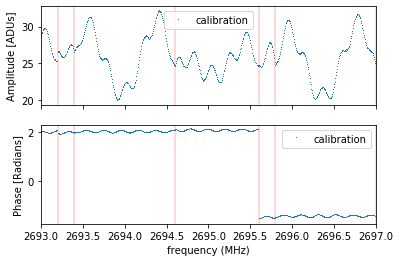

In [15]:
Scan.plotCalibrationAndScan(fTones[0]-2, fTones[0]+2, calibration)

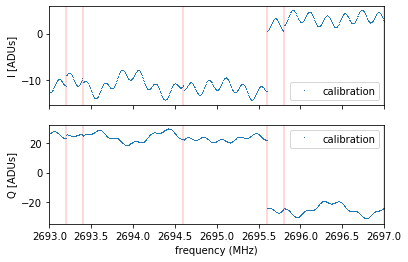

In [16]:
Scan.plotCalibrationAndScan(fTones[0]-2, fTones[0]+2, calibration, doIQ=True)

In [17]:
# Save this calibration for use in the next tutorial
now = datetime.datetime.now()
cfn = "calibration-kpup-%s.pkl"%(datetime.datetime.strftime(now,"%Y-%m-%d-%H-%M-%S"))
with open(cfn, 'wb') as file:
    pickle.dump(calibration, file)
print("Wrote calibration to ",cfn)

Wrote calibration to  calibration-kpup-2023-03-24-14-14-10.pkl
